In [8]:
# get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-12-04 19:24:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 142.251.16.128, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2022-12-04 19:24:19 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [9]:
!ls pizza_steak

test  train


In [10]:
!ls pizza_steak/train

pizza  steak


In [11]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [12]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [13]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  4 19:24 .
drwxr-xr-x 1 root root 4096 Dec  4 19:24 ..
drwxr-xr-x 4 root root 4096 Dec  4 19:24 test
drwxr-xr-x 4 root root 4096 Dec  4 19:24 train


In [14]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [15]:
num_steak_images_train

750

In [16]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  # set up the target directory (we'll view the images from here)

  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['238843.jpg']
Image shape: (384, 512, 3)


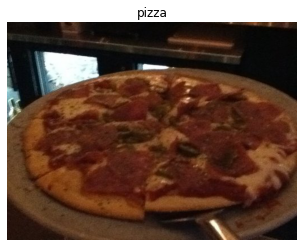

In [18]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img

array([[[152,  85,  17],
        [149,  81,  16],
        [153,  85,  20],
        ...,
        [ 64,  80,  95],
        [ 86, 113, 140],
        [ 99, 134, 172]],

       [[147,  80,  12],
        [147,  79,  14],
        [154,  86,  21],
        ...,
        [ 96, 109, 117],
        [120, 142, 163],
        [125, 156, 185]],

       [[148,  80,  15],
        [149,  81,  16],
        [158,  90,  25],
        ...,
        [114, 120, 116],
        [117, 132, 137],
        [101, 123, 136]],

       ...,

       [[  6,   6,   4],
        [  3,   0,   0],
        [ 23,  16,   0],
        ...,
        [ 11,   8,  19],
        [ 14,   8,  18],
        [ 17,  10,  18]],

       [[  1,   3,   2],
        [  5,   4,   0],
        [ 13,   5,   0],
        ...,
        [ 13,   7,  17],
        [ 15,   8,  16],
        [ 17,   7,  15]],

       [[  0,   0,   2],
        [  9,   8,   4],
        [  6,   0,   0],
        ...,
        [ 14,   8,  18],
        [ 17,   7,  16],
        [ 16,   5,  11]]

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[152,  85,  17],
        [149,  81,  16],
        [153,  85,  20],
        ...,
        [ 64,  80,  95],
        [ 86, 113, 140],
        [ 99, 134, 172]],

       [[147,  80,  12],
        [147,  79,  14],
        [154,  86,  21],
        ...,
        [ 96, 109, 117],
        [120, 142, 163],
        [125, 156, 185]],

       [[148,  80,  15],
        [149,  81,  16],
        [158,  90,  25],
        ...,
        [114, 120, 116],
        [117, 132, 137],
        [101, 123, 136]],

       ...,

       [[  6,   6,   4],
        [  3,   0,   0],
        [ 23,  16,   0],
        ...,
        [ 11,   8,  19],
        [ 14,   8,  18],
        [ 17,  10,  18]],

       [[  1,   3,   2],
        [  5,   4,   0],
        [ 13,   5,   0],
        ...,
        [ 13,   7,  17],
        [ 15,   8,  16],
        [ 17,   7,  15]],

       [[  0,   0,   2],
        [  9,   8,   4],
        [  6,   0,   0],
        ...,
        [ 14,   8,  1

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
img.shape #return width height and color channels

(512, 382, 3)

In [ ]:
# pre-processing  = normalize data
# turn them into same shape
# turn images into numerical data

In [ ]:
img/255. #255 is the maximum pixel value.

array([[[0.59607843, 0.33333333, 0.06666667],
        [0.58431373, 0.31764706, 0.0627451 ],
        [0.6       , 0.33333333, 0.07843137],
        ...,
        [0.25098039, 0.31372549, 0.37254902],
        [0.3372549 , 0.44313725, 0.54901961],
        [0.38823529, 0.5254902 , 0.6745098 ]],

       [[0.57647059, 0.31372549, 0.04705882],
        [0.57647059, 0.30980392, 0.05490196],
        [0.60392157, 0.3372549 , 0.08235294],
        ...,
        [0.37647059, 0.42745098, 0.45882353],
        [0.47058824, 0.55686275, 0.63921569],
        [0.49019608, 0.61176471, 0.7254902 ]],

       [[0.58039216, 0.31372549, 0.05882353],
        [0.58431373, 0.31764706, 0.0627451 ],
        [0.61960784, 0.35294118, 0.09803922],
        ...,
        [0.44705882, 0.47058824, 0.45490196],
        [0.45882353, 0.51764706, 0.5372549 ],
        [0.39607843, 0.48235294, 0.53333333]],

       ...,

       [[0.02352941, 0.02352941, 0.01568627],
        [0.01176471, 0.        , 0.        ],
        [0.09019608, 0

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Get all the pixel values b/w 0 and 1 (normalizing the data)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# building a cnn model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])

histroy_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 231ms/step - loss: 0.6048 - accuracy: 0.6540 - val_loss: 0.4408 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4466 - accuracy: 0.7900 - val_loss: 0.3588 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4311 - accuracy: 0.8060 - val_loss: 0.4504 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3937 - accuracy: 0.8267 - val_loss: 0.3163 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3232 - accuracy: 0.8667 - val_loss: 0.3285 - val_accuracy: 0.8620


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 15)

Epoch 1/15
47/47 [==============================] - 10s 208ms/step - loss: 0.9071 - accuracy: 0.6367 - val_loss: 0.4979 - val_accuracy: 0.7580
Epoch 2/15
47/47 [==============================] - 10s 205ms/step - loss: 0.5536 - accuracy: 0.7360 - val_loss: 0.5000 - val_accuracy: 0.7560
Epoch 3/15
47/47 [==============================] - 9s 198ms/step - loss: 0.5694 - accuracy: 0.7407 - val_loss: 0.4837 - val_accuracy: 0.7660
Epoch 4/15
47/47 [==============================] - 9s 197ms/step - loss: 0.5205 - accuracy: 0.7607 - val_loss: 0.4792 - val_accuracy: 0.7800
Epoch 5/15
47/47 [==============================] - 9s 200ms/step - loss: 0.4296 - accuracy: 0.8113 - val_loss: 0.4512 - val_accuracy: 0.7820
Epoch 6/15
47/47 [==============================] - 9s 196ms/step - loss: 0.4321 - accuracy: 0.8167 - val_loss: 0.4117 - val_accuracy: 0.8020
Epoch 7/15
47/47 [==============================] - 9s 188ms/step - loss: 0.4187 - accuracy: 0.8153 - val_loss: 0.4578 - val_accuracy: 0.7860
Epoc

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 75)                7575      
                                                                 
 dense_3 (Dense)             (None, 50)                3800      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 10)               

['2939678.jpg']
Image shape: (512, 512, 3)
['2694223.jpg']
Image shape: (512, 512, 3)


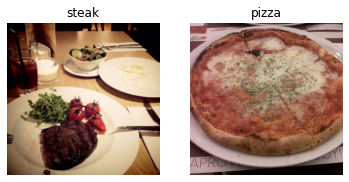

In [ ]:
plt.figure()

plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
!nvidia-smi

Sun Dec  4 12:15:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |   2422MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen  = ImageDataGenerator(rescale = 1/255.)



In [22]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size= (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images, labels
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [ ]:
len(train_data)

47

In [ ]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
images[7], images[7].shape

(array([[[0.16078432, 0.10980393, 0.13725491],
         [0.16078432, 0.10980393, 0.13725491],
         [0.16862746, 0.11764707, 0.14509805],
         ...,
         [0.10980393, 0.1137255 , 0.12941177],
         [0.11764707, 0.12156864, 0.12941177],
         [0.09019608, 0.10588236, 0.10980393]],
 
        [[0.1764706 , 0.1254902 , 0.15294118],
         [0.17254902, 0.12156864, 0.14901961],
         [0.1764706 , 0.13333334, 0.15686275],
         ...,
         [0.12156864, 0.10196079, 0.11764707],
         [0.1137255 , 0.10588236, 0.11764707],
         [0.10588236, 0.10588236, 0.1137255 ]],
 
        [[0.17254902, 0.12156864, 0.14901961],
         [0.16078432, 0.11764707, 0.14117648],
         [0.16470589, 0.12156864, 0.14509805],
         ...,
         [0.20392159, 0.16078432, 0.1764706 ],
         [0.17254902, 0.13725491, 0.15686275],
         [0.12941177, 0.10196079, 0.12941177]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.12941177],
         [0.09411766, 0.09411766, 0.13333

In [ ]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# if padding is set as same the o/p shape is,
# same as the input shape. (No decrease in the dimensionality of the o/p layer)
# if padding is set as "valid" the o/p shape gets compressed.
# striding means compressing the shape of the o/p layer.
# striding means a size of the step a sliding window takes across an input
# filters is the number of sliding windows across an input.(10)
# kernel size is the size of each sliding window, going across an input.
# train data is the combination of (X, y). 
model_3  =  Sequential([
    Conv2D(filters = 10,
           kernel_size = (3,3),
           strides = (1,1),
           padding = "valid",
           activation = "relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

model_3.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 3.4887 - accuracy: 0.5200 - val_loss: 0.6873 - val_accuracy: 0.5140
Epoch 2/5


KeyboardInterrupt: ignored

In [ ]:
model_3.summary()

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_1.summary()

In [ ]:
import pandas as pd

pd.DataFrame(history_3.history).plot(figsize = (10, 7),
                                     xlabel = "epochs")

In [2]:
def plot_loss_curves(history):
  """
  Returns the loss and accuracy curves
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["accuracy"]))

  # plot loss curve

  plt.plot(epochs, loss, label = "train_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy curve

  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **Note:** When a model's validation loss starts to increase, its likely the model is overfitting the training data set.
Hence model's ability to generalize the unseen data gets diminished.

In [ ]:
plot_loss_curves(history_3)

###     Steps to induce overfitting.
* increase the number of conv layers
* increase the number of conv filters
* increase the number of Dense layers
### Steps to reduce overfitting
* add data augmentation 
* add regularization layers (MaxPool2D)

**Note**
Reducing overfitting is also known as regularization

In [ ]:
model_4 = Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

])



In [ ]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

In [ ]:
model_4.summary()

In [ ]:
plot_loss_curves(history_4)

**Note:**
Data augmentation is done generally on training data

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                         rotation_range = 0.2,
                         shear_range = 0.2,
                         zoom_range = 0.2,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         horizontal_flip = True)

print("non-augmented train data")

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               shuffle = False,
                                               class_mode = "binary")

print("augmented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size = 32,
                                                                   target_size = (224, 224),
                                                                   shuffle = False,
                                                                   class_mode = "binary")

print("non augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

non-augmented train data
Found 1500 images belonging to 2 classes.
augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


Showing image number 20


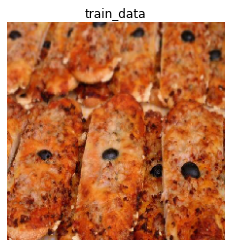

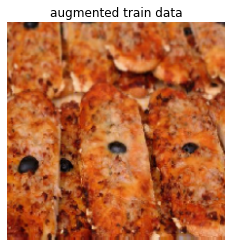

In [25]:
# Visualizing train vs augmented train data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

import random as rand
import matplotlib.pyplot as plt

random_number = random.randint(0, 31)
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("train_data")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented train data")
plt.axis(False);




In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
                               
                               
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

    
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224, 224),
                                                                            batch_size = 32,
                                                                            class_mode = "binary",
                                                                            shuffle = True)

In [ ]:
model_6 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(10, 3, activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")


])

In [ ]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_6)

**Note** Shuffling removes bias in a model, while training (**Shuffling** is important)

### To improve the model

*Increase the number of conv2d/MaxPool2D layers

*increase the number of filters (32, 64)

*Find an ideal learning rate

In [ ]:
import tensorflow as tf
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
                               
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_7)

In [ ]:
print(class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak  = mpimg.imread("03-steak.jpeg")


In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

In [ ]:
steak


In [ ]:
# model_6.predict(steak)

In [ ]:
# expanded_steak = tf.expand_dims(steak, axis = 0)

In [ ]:
# expanded_steak.shape

In [ ]:
224 * 224 * 3

In [ ]:
# model_7.predict(expanded_steak)

In [ ]:
# squeezed_steak = tf.squeeze(steak, axis = 1)

In [ ]:
# squeezed_steak.shape

In [ ]:
# steak_reshape = steak.reshape(36578304)

In [ ]:
# 4032 * 3024 * 3

In [ ]:
# model_7.predict(steak_reshape)

In [ ]:
# def load_and_prep_image(filename, img_shape = 224):
#   """
#   Reads and image from filename and turns it into a tensor and rehsapes
#   it to (img_shape, img_shape, color_channels).
#   """

#   # Read an image
#   img = tf.io.read_file(filename)
#   # Decode the read file into a tensor
#   img = tf.image.decode_image(img)
#   # resize
#   img = tf.image.resize(img, size=[img_shape, img_shape])
#   # rescaling 
#   img = img/255.
#   return img









In [26]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and rehsapes
  it to (img_shape, img_shape, color_channels).
  """
  # Read an image

  img = tf.io.read_file(filename)
  # decode the given image (recognize the format of the image(jpeg, gif etc..)),
  # and convert it into a tensor.

  img = tf.image.decode_image(img)
  # resize

  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale

  img = img/255.

  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))

In [ ]:
class_names

In [ ]:
# Index the predicted class by rounding the prediction probabilities and 
# indexing it on the class_names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
# def pred_and_plot(model, filename, class_names = class_names):
#   """
#   Imports an image located at filename, makes a prediction with model
#   and plots the image with the predicted class as title.
#   """

#   # import the target image and process it.
#   img = load_and_prep_image(filename)

#   # Make a prediction.
#   pred = model.predict(tf.expand_dims(img, axis = 0))

#   # Get the predicted class.
#   pred_class = class_names[int(tf.round(pred))]
  
#   # Plot the image and the predicted class.
#   plt.imshow(img)
#   plt.title(f"Prediction : {pred_class}")
#   plt.axis(False);


In [27]:
# def pred_and_plot(model, filename, class_names = class_names):
#   """
#   Reads an image located at filename, makes a prediction, gets the 
#   predicted class and plot the image with predicted class as title.
#   """

#   # Import and process the image.
#   img = load_and_prep_image(filename)

#   # Making a prediction.
#   pred = model.predict(tf.expand_dims(img, axis = 0))

#   # Getting the predicted class
#   pred_class = class_names[int(tf.round(pred))]

#   # plot the image wit predicted class as the title.
#   plt.imshow(img)
#   plt.title(f"Prediction: {pred_class}")
#   plt.axis(False);

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")

In [ ]:
pizza = load_and_prep_image("03-pizza-dad.jpeg")

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

### MUlticlass CNN

In [28]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-04 19:27:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.188.48, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   119MB/s    in 3.9s    

2022-12-04 19:27:14 (129 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [29]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [30]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [31]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1923909.jpg']
Image shape: (384, 512, 3)


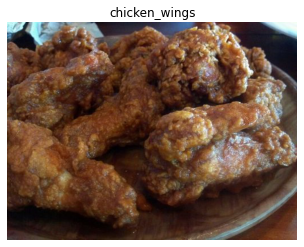

In [32]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [33]:
random.choice(class_names)

'ramen'

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [42]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           input_shape = (224, 224, 3),
                           activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [43]:
model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [44]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1649 - accuracy: 0.1967 - val_loss: 2.0151 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 47s 198ms/step - loss: 1.9048 - accuracy: 0.3392 - val_loss: 1.8503 - val_accuracy: 0.3676
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 1.5779 - accuracy: 0.4717 - val_loss: 1.9505 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 47s 198ms/step - loss: 1.0383 - accuracy: 0.6651 - val_loss: 2.2777 - val_accuracy: 0.3244
Epoch 5/5
235/235 [==============================] - 48s 203ms/step - loss: 0.4911 - accuracy: 0.8443 - val_loss: 3.1450 - val_accuracy: 0.2744


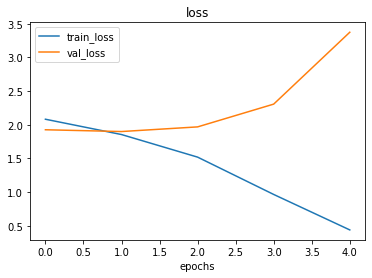

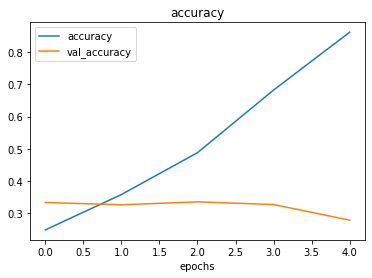

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 3.3728 - accuracy: 0.2792


[3.3727734088897705, 0.2791999876499176]

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

**Note** Solving the problem of overfitting by increasing the number of maxPool layers.
* Simplify the model by -reducing the layers or hidden layers
* Use data augmentation
* Get more data
---



In [ ]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    

    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")

])

In [ ]:
model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 199ms/step - loss: 2.1093 - accuracy: 0.2311 - val_loss: 1.9490 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.8591 - accuracy: 0.3591 - val_loss: 1.8484 - val_accuracy: 0.3512
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.7214 - accuracy: 0.4175 - val_loss: 1.8203 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 1.5664 - accuracy: 0.4764 - val_loss: 1.8721 - val_accuracy: 0.3652
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 1.3936 - accuracy: 0.5305 - val_loss: 1.9525 - val_accuracy: 0.3628


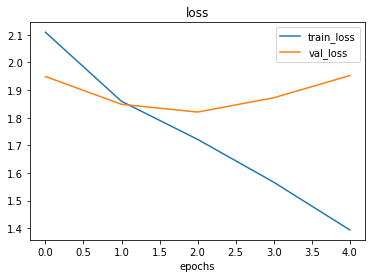

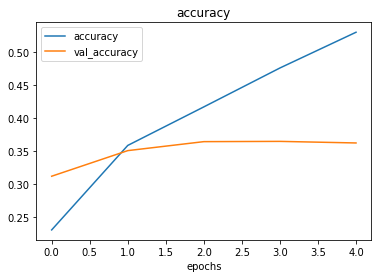

In [ ]:
plot_loss_curves(history_9)

In [35]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"       

train_datagen = ImageDataGenerator(rescale = 1/255.)


train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [36]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   class_mode = "categorical",
                                                                   batch_size = 32,
                                                                   target_size = (224, 224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [37]:
import tensorflow as tf
model_10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])



In [38]:
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [39]:
history_10 = model_10.fit(train_data_augmented,
                          epochs = 20,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/20
235/235 [==============================] - 124s 524ms/step - loss: 2.2370 - accuracy: 0.1519 - val_loss: 2.1489 - val_accuracy: 0.1992
Epoch 2/20
235/235 [==============================] - 117s 498ms/step - loss: 2.1157 - accuracy: 0.2340 - val_loss: 1.9889 - val_accuracy: 0.2880
Epoch 3/20
235/235 [==============================] - 117s 498ms/step - loss: 2.0594 - accuracy: 0.2667 - val_loss: 1.9098 - val_accuracy: 0.3368
Epoch 4/20
235/235 [==============================] - 116s 495ms/step - loss: 2.0238 - accuracy: 0.2776 - val_loss: 1.8906 - val_accuracy: 0.3476
Epoch 5/20
235/235 [==============================] - 116s 492ms/step - loss: 1.9899 - accuracy: 0.3073 - val_loss: 1.8426 - val_accuracy: 0.3596
Epoch 6/20
235/235 [==============================] - 116s 492ms/step - loss: 1.9419 - accuracy: 0.3252 - val_loss: 1.7934 - val_accuracy: 0.4028
Epoch 7/20
235/235 [==============================] - 116s 494ms/step - loss: 1.9055 - accuracy: 0.3401 - val_loss: 1.7663 -

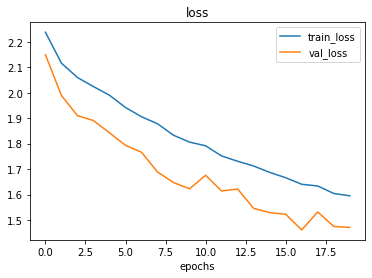

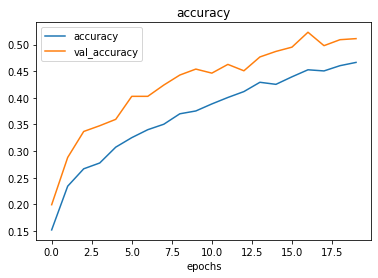

In [40]:
plot_loss_curves(history_10)

In [45]:
model_11 = tf.keras.models.clone_model(model_8)
model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])
history_11 = model_11.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 488ms/step - loss: 2.2158 - accuracy: 0.1689 - val_loss: 2.1084 - val_accuracy: 0.2352
Epoch 2/5
235/235 [==============================] - 114s 487ms/step - loss: 2.1006 - accuracy: 0.2455 - val_loss: 2.0019 - val_accuracy: 0.2996
Epoch 3/5
235/235 [==============================] - 114s 484ms/step - loss: 2.0077 - accuracy: 0.2952 - val_loss: 1.8963 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9418 - accuracy: 0.3284 - val_loss: 1.7885 - val_accuracy: 0.3908
Epoch 5/5
235/235 [==============================] - 115s 487ms/step - loss: 1.8970 - accuracy: 0.3455 - val_loss: 1.8216 - val_accuracy: 0.3636


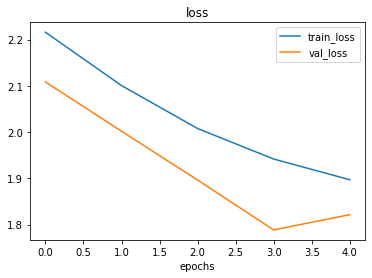

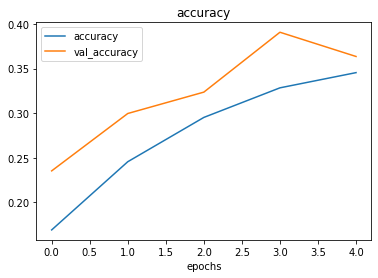

In [46]:
plot_loss_curves(history_11)

### Making predictions on custom images

In [48]:
class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [49]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-12-04 20:30:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-12-04 20:30:13 (229 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-12-04 20:30:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [66]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Reads an image located at filename, makes a prediction, gets the 
  predicted class and plot the image with predicted class as title.
  """

  # Import and process the image.
  img = load_and_prep_image(filename)

  # Making a prediction.
  pred = model.predict(tf.expand_dims(img, axis = 0))

  
  
  # Logic for multi class

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])] 
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  

  # plot the image wit predicted class as the title.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


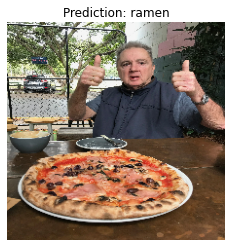

In [68]:
pred_and_plot(model = model_10,
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 78ms/step


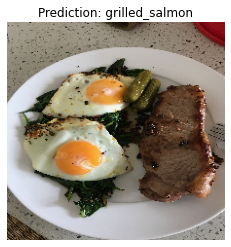

In [69]:
pred_and_plot(model = model_10,
              filename = "03-steak.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 34ms/step


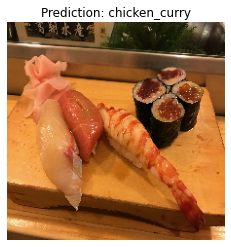

In [70]:
pred_and_plot(model = model_10,
              filename = "03-sushi.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 46ms/step


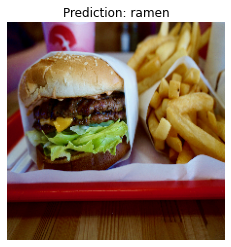

In [71]:
pred_and_plot(model = model_10,
              filename = "03-hamburger.jpeg",
              class_names = class_names)

## Saving and Loading  model

In [73]:
model_10.save("saved_trained_model_10")

In [74]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")

In [75]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 179ms/step - loss: 1.4713 - accuracy: 0.5112


[1.471346139907837, 0.5112000107765198]

In [76]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 1.4713 - accuracy: 0.5112


[1.471346139907837, 0.5112000107765198]